In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

 (a)

In [2]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

What is 𝑛 and what is 𝑝?

n represents the number of observations, which is the number of data points in 𝑥 and 𝑦. For this case, n=100 since size=100 is specified. p represents the number of predictors (or independent variables) used to generate y. Here, there is only one predictor 𝑥, so p=1.

Write out the model used to generate the data in equation form.

The code specifies that:

where 𝜖 ∼ Normal(0,1), representing random noise added to 𝑦 from a normal distribution (since rng.normal(size=100) generates 100 random values from a standard normal distribution with mean 0 and some variance).

This equation describes how y is generated based on x with added Gaussian noise 𝜖.

# (b) Create a scatterplot of X against Y . Comment on what you find.

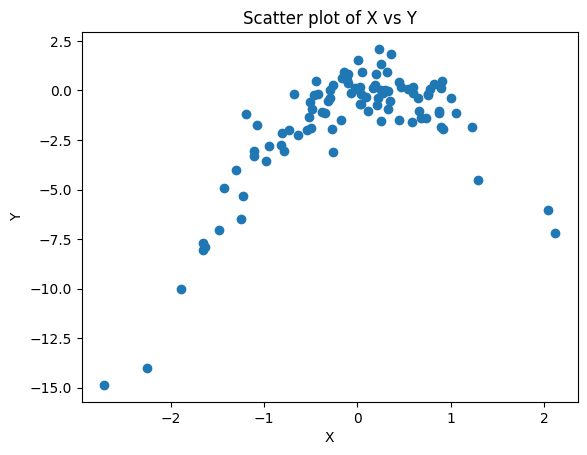

In [6]:
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X vs Y')
plt.show()

觀察上圖可以發現 X Y 不存在顯著的線性關係

# (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut

# 設定隨機種子
np.random.seed(0)

# 生成隨機資料
x = np.random.normal(size=100)
y = x - 2 * x**2 + np.random.normal(size=100)

# 將 x 轉換成 DataFrame 以便於特徵管理
X = x.reshape(-1, 1)
data = pd.DataFrame({'X': x, 'Y': y})

# 定義一個函數來計算特定多項式階數的 LOOCV 誤差
def loocv_error(degree):
    poly = PolynomialFeatures(degree)  # 創建多項式特徵
    X_poly = poly.fit_transform(X)     # 將 X 轉換為指定階數的多項式特徵
    loo = LeaveOneOut()                # 設定 LOOCV
    model = LinearRegression()         # 建立線性回歸模型
    errors = []                        # 用於儲存每次迭代的誤差

    # 對每個樣本進行 LOOCV
    for train_index, test_index in loo.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)     # 使用訓練集訓練模型
        y_pred = model.predict(X_test)  # 使用模型預測測試集
        errors.append(mean_squared_error(y_test, y_pred))  # 計算並儲存誤差

    # 回傳所有誤差的平均值
    return np.mean(errors)

# 計算階數 1 到 4 的模型的 LOOCV 誤差
loocv_errors = {f"Model degree {i}": loocv_error(i) for i in range(1, 5)}
loocv_errors


{'Model degree 1': 8.888205832586202,
 'Model degree 2': 1.1161531889772691,
 'Model degree 3': 1.1622258803903232,
 'Model degree 4': 1.14714794300914}

# (d) Repeat (c) using another random seed, and report your results.Are your results the same as what you got in (c)? Why?

In [12]:
# 設定隨機種子
np.random.seed(1)

# 生成隨機資料
x = np.random.normal(size=100)
y = x - 2 * x**2 + np.random.normal(size=100)

# 將 x 轉換成 DataFrame 以便於特徵管理
X = x.reshape(-1, 1)
data = pd.DataFrame({'X': x, 'Y': y})

# 定義一個函數來計算特定多項式階數的 LOOCV 誤差
def loocv_error(degree):
    poly = PolynomialFeatures(degree)  # 創建多項式特徵
    X_poly = poly.fit_transform(X)     # 將 X 轉換為指定階數的多項式特徵
    loo = LeaveOneOut()                # 設定 LOOCV
    model = LinearRegression()         # 建立線性回歸模型
    errors = []                        # 用於儲存每次迭代的誤差

    # 對每個樣本進行 LOOCV
    for train_index, test_index in loo.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)     # 使用訓練集訓練模型
        y_pred = model.predict(X_test)  # 使用模型預測測試集
        errors.append(mean_squared_error(y_test, y_pred))  # 計算並儲存誤差

    # 回傳所有誤差的平均值
    return np.mean(errors)

# 計算階數 1 到 4 的模型的 LOOCV 誤差
loocv_errors = {f"Model degree {i}": loocv_error(i) for i in range(1, 5)}
loocv_errors


{'Model degree 1': 6.260764331604616,
 'Model degree 2': 0.9142897072803663,
 'Model degree 3': 0.9268768781648804,
 'Model degree 4': 0.8669116865881082}

random seed不同導致資料略有變化，因為資料生成的真實模型是二次方程，所以quadratic model能最佳地擬合主要趨勢，因此在 LOOCV 中仍持續表現最佳。

# (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

二次模型（degree 2）的 LOOCV 誤差最低，約為 1.116。由於生成 \( y \) 的真實關係式是 \( x \) 的二次函數，因此二次模型如預期般表現最佳。

# (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [13]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# 定義函數以擬合模型並顯示係數的統計顯著性
def fit_model_and_display_summary(degree, X, y):
    # 創建至指定階數的多項式特徵
    poly = PolynomialFeatures(degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # 使用 statsmodels 擬合模型以獲取詳細的統計輸出
    X_poly = sm.add_constant(X_poly)  # 加入截距項
    model = sm.OLS(y, X_poly).fit()
    return model.summary()

# 擬合 1 到 4 階的模型並顯示摘要
model_summaries = {f"Model degree {i}": fit_model_and_display_summary(i, X, y) for i in range(1, 5)}

model_summaries


{'Model degree 1': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.093
 Model:                            OLS   Adj. R-squared:                  0.083
 Method:                 Least Squares   F-statistic:                     9.997
 Date:                Sun, 10 Nov 2024   Prob (F-statistic):            0.00209
 Time:                        08:31:11   Log-Likelihood:                -228.87
 No. Observations:                 100   AIC:                             461.7
 Df Residuals:                      98   BIC:                             466.9
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------

每個模型中係數的統計顯著性應該與交叉驗證結果相符。二次模型（degree 2）擁有最低的 LOOCV 誤差，且預期線性和二次項的係數會顯著，這符合資料的真實模式。三次和四次模型中的高階項應該不顯著，這在統計顯著性上有所反映，並與 LOOCV 的結果一致。